In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
from pyphoon.db.pd_manager import PDManager
import pandas as pd
from os.path import exists

In [4]:
images_file = '../../../database/images.pkl'
best_file = '../../../database/besttrack.pkl'
missing_file = '../../../database/missing.pkl'
corrected_file = '../../../database/corrected.pkl'
pd_man = PDManager()
pd_man.load_original_images(images_file)
pd_man.load_besttrack(best_file)
pd_man.load_corrected_images(corrected_file)

In [9]:
if not exists(missing_file):
    print('Missing database file not found, creating new...')
    pd_man.add_missing_frames()
    pd_man.save_missing(missing_file)
    print('Done.')
else:
    pd_man.load_missing_images_info(missing_file)

In [13]:
missing = pd_man.missing
one_hour_seqs = missing[missing.time_step == pd.Timedelta(hours=1)]

In [14]:
one_hour_seqs.head()

,start_time,time_step,frames_num,missing_num,completeness,missing_frames,have_good_neighbours
seq_no,,,,,,,
198702,1987-04-09 19:00:00,01:00:00,160,4,0.975000,"[19, 21, 40, 149]","[19, 21, 40, 149]"
198703,1987-06-17 00:00:00,01:00:00,73,0,1.000000,[],[]
198704,1987-06-26 00:00:00,01:00:00,211,3,0.985782,"[2, 4, 165]","[2, 4, 165]"
198705,1987-07-07 00:00:00,01:00:00,256,4,0.984375,"[2, 46, 66, 147]","[2, 46, 66, 147]"
198706,1987-07-16 06:00:00,01:00:00,145,3,0.979310,"[104, 105, 124]",[124]


In [19]:
years = one_hour_seqs.start_time.dt.year.unique()

In [21]:
years

array([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [69]:
missing_years = {}
can_recover_years = {}
for year in years:
    missing_years.update({year: 0})
    can_recover_years.update({year: 0})
    

In [70]:
for row in one_hour_seqs.iterrows():
    year = row[1].start_time.year
#     print(year.iloc[0], type(year))
    _mis_frames = missing_years.get(year)
    _rec_frames = can_recover_years.get(year)
    # missing frames update
    _mis_frames += len(row[1].missing_frames)
    missing_years.update({year : _mis_frames})
    # recoverable frames update
    _rec_frames += len(row[1].have_good_neighbours)
    can_recover_years.update({year : _rec_frames})    

In [97]:
mis_years = pd.DataFrame.from_dict(missing_years, orient='index')
mis_years.columns = ['missing_frames']
rec_years = pd.DataFrame.from_dict(can_recover_years, orient='index')
rec_years.columns = ['recoverable']

In [101]:
mis_rec = pd.concat([mis_years, rec_years], axis=1)

In [102]:
%matplotlib inline

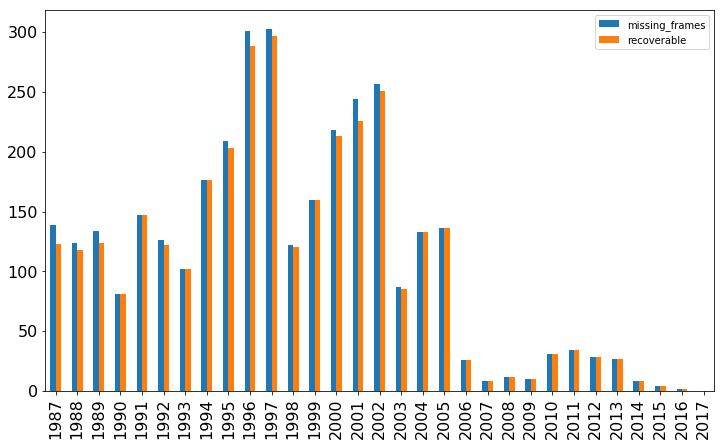

In [119]:
fig = mis_rec.plot(kind='bar', figsize=(12,7), fontsize=16).get_figure()
fig.savefig('recoverable.png')

In [124]:
sum(missing_years.values())

3389

In [126]:
sum(can_recover_years.values())

3295

In [5]:
corrected_dir = 'corr'
original_dir = 'orig'

In [8]:
corrected = pd_man.corrected
original = pd_man.images

In [9]:
from os.path import join

In [24]:
original['full_path'] = original.apply(lambda row: join(original_dir, row['directory'], row['filename']), axis=1) 

In [19]:
corrected['full_path'] = corrected.apply(lambda row: join(corrected_dir, row['directory'], row['filename']), axis=1) 

In [20]:
original['full_path'] = corrected['full_path']

In [41]:
# merge = original.merge(corrected, how='right')
# merge.loc[merge.full_path.str.contains('corr')]
merge = corrected.combine_first(original)
merge.loc[merge.full_path.str.contains('corr')]

corruption directory                     filename  \
seq_no obs_time                                                                 
197901 1979-01-03 16:00:00    0.004311    197901  1979010316-197901-GMS1-1.h5   
       1979-01-06 21:00:00    0.002281    197901  1979010621-197901-GMS1-1.h5   
       1979-01-07 06:00:00    0.000004    197901  1979010706-197901-GMS1-1.h5   
197902 1979-03-22 03:00:00    0.000328    197902  1979032203-197902-GMS1-1.h5   
       1979-03-22 06:00:00    0.000103    197902  1979032206-197902-GMS1-1.h5   
       1979-03-23 03:00:00    0.000240    197902  1979032303-197902-GMS1-1.h5   
       1979-03-23 06:00:00    0.000080    197902  1979032306-197902-GMS1-1.h5   
197903 1979-04-13 03:00:00    0.000004    197903  1979041303-197903-GMS1-1.h5   
       1979-04-14 03:00:00    0.000336    197903  1979041403-197903-GMS1-1.h5   
       1979-04-14 06:00:00    0.000137    197903  1979041406-197903-GMS1-1.h5   
       1979-04-16 03:00:00    0.000019    197903  1979041603-197903-GMS1-1.h5   
       1979-04-18 03:00:00    0.000011    197903  1979041803-197903-GMS1-1.h5   
       1979-04-19 03:00:00    0.000019    197903  1979041903-197903-GMS1-1.h5   
       1979-04-19 06:00:00    0.000137    197903  1979041906-197903-GMS1-1.h5   
       1979-04-20 03:00:00    0.000053    197903  1979042003-197903-GMS1-1.h5   
       1979-04-20 06:00:00    0.000225    197903  1979042006-197903-GMS1-1.h5   
197904 1979-05-09 06:00:00    0.000767    197904  1979050906-197904-GMS1-1.h5   
       1979-05-10 06:00:00    0.001488    197904  1979051006-197904-GMS1-1.h5   
       1979-05-11 03:00:00    0.000019    197904  1979051103-197904-GMS1-1.h5   
       1979-05-11 06:00:00    0.000023    197904  1979051106-197904-GMS1-1.h5   
       1979-05-17 03:00:00    0.002293    197904  1979051703-197904-GMS1-1.h5   
197905 1979-05-20 03:00:00    0.000034    197905  1979052003-197905-GMS1-1.h5   
       1979-05-20 06:00:00    0.000576    197905  1979052006-197905-GMS1-1.h5   
       1979-05-21 06:00:00    0.000191    197905  1979052106-197905-GMS1-1.h5   
197906 1979-07-07 00:00:00    0.002266    197906  1979070700-197906-GMS1-1.h5   
197907 1979-07-04 03:00:00    0.001949    197907  1979070403-197907-GMS1-1.h5   
       1979-07-07 00:00:00    0.009987    197907  1979070700-197907-GMS1-1.h5   
197908 1979-07-29 09:00:00    0.000004    197908  1979072909-197908-GMS1-1.h5   
       1979-07-30 03:00:00    0.002399    197908  1979073003-197908-GMS1-1.h5   
       1979-07-31 06:00:00    0.000347    197908  1979073106-197908-GMS1-1.h5   
...                                ...       ...                          ...   
201703 2017-07-04 05:00:00    0.002769    201703  2017070405-201703-HMW8-1.h5   
       2017-07-04 06:00:00    0.001808    201703  2017070406-201703-HMW8-1.h5   
       2017-07-04 07:00:00    0.000832    201703  2017070407-201703-HMW8-1.h5   
       2017-07-04 08:00:00    0.000004    201703  2017070408-201703-HMW8-1.h5   
201709 2017-07-30 04:00:00    0.000019    201709  2017073004-201709-HMW8-1.h5   
       2017-07-30 05:00:00    0.000175    201709  2017073005-201709-HMW8-1.h5   
       2017-07-30 06:00:00    0.000221    201709  2017073006-201709-HMW8-1.h5   
       2017-07-30 07:00:00    0.000183    201709  2017073007-201709-HMW8-1.h5   
       2017-07-30 08:00:00    0.000038    201709  2017073008-201709-HMW8-1.h5   
201710 2017-07-31 05:00:00    0.000107    201710  2017073105-201710-HMW8-1.h5   
       2017-07-31 06:00:00    0.000336    201710  2017073106-201710-HMW8-1.h5   
       2017-07-31 07:00:00    0.000156    201710  2017073107-201710-HMW8-1.h5   
       2017-08-02 03:00:00    0.000027    201710  2017080203-201710-HMW8-1.h5   
       2017-08-02 04:00:00    0.005047    201710  2017080204-201710-HMW8-1.h5   
       2017-08-02 05:00:00    0.009480    201710  2017080205-201710-HMW8-1.h5   
       2017-08-02 06:00:00    0.015732    201710  2017080206-201710-HMW8-1.h5   
       2017-08-02 07:00:00    0.014690    201710  201708020

In [ ]:
corrected['full_path'] = join(self.corrected_images_dir, corrected['directory'] + corrected['filename'])

In [15]:
original.head()

directory                     filename    size  \
seq_no obs_time                                                             
197830 1978-12-01 00:00:00    197830  1978120100-197830-GMS1-1.h5  232666   
       1978-12-01 03:00:00    197830  1978120103-197830-GMS1-1.h5  223096   
       1978-12-01 06:00:00    197830  1978120106-197830-GMS1-1.h5  217306   
197901 1978-12-31 12:00:00    197901  1978123112-197901-GMS1-1.h5  273096   
       1978-12-31 16:00:00    197901  1978123116-197901-GMS1-1.h5  277686   

                            frame                                full_path  
seq_no obs_time                                                             
197830 1978-12-01 00:00:00    0.0  orig/197830/1978120100-197830-GMS1-1.h5  
       1978-12-01 03:00:00    1.0  orig/197830/1978120103-197830-GMS1-1.h5  
       1978-12-01 06:00:00    2.0  orig/197830/1978120106-197830-GMS1-1.h5  
197901 1978-12-31 12:00:00    0.0  orig/197901/1978123112-197901-GMS1-1.h5  
       1978-12-31 16:00:00    3.0  orig/197901/1978123116-197901-GMS1-1.h5

In [17]:
full_paths = []
for index, row in original.iterrows():
    if index in corrected.index:
        full_path.loc[index, 'full_path'] = join(corrected_dir, corrected.loc[index, 'directory'], 
                                                 corrected.loc[index, 'filename'])

AttributeError: 'Series' object has no attribute 'iterrows'

## Generating triplets

In [5]:
missing = pd_man.missing
images = pd_man.images

In [6]:
#Selecting one hour resolution sequences
one_hour_seqs = missing[missing.time_step == pd.Timedelta(hours=1)]

In [7]:
one_hour_seqs.head()

,start_time,time_step,frames_num,missing_num,completeness,missing_frames,have_good_neighbours
seq_no,,,,,,,
198702,1987-04-09 19:00:00,01:00:00,160,4,0.975000,"[19, 21, 40, 149]","[19, 21, 40, 149]"
198703,1987-06-17 00:00:00,01:00:00,73,0,1.000000,[],[]
198704,1987-06-26 00:00:00,01:00:00,211,3,0.985782,"[2, 4, 165]","[2, 4, 165]"
198705,1987-07-07 00:00:00,01:00:00,256,4,0.984375,"[2, 46, 66, 147]","[2, 46, 66, 147]"
198706,1987-07-16 06:00:00,01:00:00,145,3,0.979310,"[104, 105, 124]",[124]


In [8]:
def get_triplets(seq_no):
    seq = one_hour_seqs.loc[seq_no]
    triplets = []
    for frame in range(1, seq.frames_num - 1):
        triplet = [frame - 1, frame, frame + 1]
        if len(set(seq.missing_frames).intersection(triplet)) == 0:
            triplets.append(triplet)
    return triplets

In [9]:
triplets_num = 0
for seq_no in one_hour_seqs.index:
    triplets = get_triplets(seq_no=seq_no)
    triplets_num += len(triplets)
#     print(seq_no, len(triplets))
print ('Total: {0}'.format(triplets_num))

Total: 143774


In [12]:
seq_no = 198702
missing_frames = missing.loc[seq_no, 'missing_frames']
triplets = get_triplets(seq_no)
seq_images = images.loc[seq_no]
frame_nums = len(seq_images) + len(missing_frames)
frames = list(range(0, frame_nums))
frames = [frame for frame in frames if frame not in missing_frames]
# print(len(seq_images), len(frames))
seq_images['frame'] = frames

/fs9/grishin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
pd.DataFrame.j
seq_images['frame'].is_monotonic_increasing

True

## Displaying mismatch histogram for linear interpolated images

## Displaying mismatch histogram for morphed images